In [1]:
# load data:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### importe bralibase file to a data frame 



In [2]:
# read Bralibase input that contains several runs of one parameter that was alternated
def read_file_to_df(infile):
    
    #flags:
    set_paramerter = 0
    read_file = 0
    set_header = 0

    sw_parameter = ''
    df_dict ={}


    f = open(infile, 'r') # open the file for reading
    data = []
    for row_num, line in enumerate(f):
        # Remove the new line at the end and then split the string based on
        # tabs. This creates a python list of the values.
        values = line.strip().split('\t')
        # print values

        if values[0] == 'Testing the following parameters:':
            set_paramerter = 1
            continue
        elif set_paramerter == 1:
            # get second part of string e.g. 'struct_cost 0,'
            sw_parameter = values[0].split(' ')[1]
            sw_parameter = sw_parameter.rstrip(',')
            set_paramerter = 0
            continue
        elif values[0] == '### Begin Objective Function ###':
            read_file = 1
            set_header = 1
            #print 'header'
            continue
        elif read_file ==1:
            if values[0] == '### End Objective Function ###':

                d = dict([(x[0],x[1]) for x in h])
                df = 'df_sw_' + str(sw_parameter)
                df_dict[df] = pd.DataFrame(data=d)
                #print df
                read_file = 0
                continue
            elif set_header == 1:
                h = []
                h = list([(key, []) for key in values])
                #print values
                set_header = 0
            else:
                #print values
                for pos, i in enumerate(values):
                    h[pos][1].append(i)



    f.close() # close the file
    
    return df_dict

In [3]:
# change strings to flote or interger values and add the structure weight as colum
def cast_datatyps_of_df(df, sw_range_list):

    for i in sw_range_list:
        df_name = 'df_sw_' + str(i)
        df[df_name]['PredlocalEndA'] = df[df_name]['PredlocalEndA'].astype(int)
        df[df_name]['PredlocalEndB'] = df[df_name]['PredlocalEndB'].astype(int)
        df[df_name]['PredlocalStartA'] = df[df_name]['PredlocalStartA'].astype(int)
        df[df_name]['PredlocalStartB'] = df[df_name]['PredlocalStartB'].astype(int)
        df[df_name]['sps'] = df[df_name]['sps'].astype(float)
        df[df_name]['spsmax'] = df[df_name]['spsmax'].astype(float)
        df[df_name]['apsi'] = df[df_name]['apsi'].astype(int)
        df[df_name]['sci'] = df[df_name]['sci'].astype(int)
        df[df_name]['score'] = df[df_name]['score'].astype(int)
        df[df_name]['SeqAFp'] = df[df_name]['SeqAFp'].astype(int)
        df[df_name]['SeqATn'] = df[df_name]['SeqATn'].astype(int)
        df[df_name]['SeqATp'] = df[df_name]['SeqATp'].astype(int)
        df[df_name]['SeqAFn'] = df[df_name]['SeqAFn'].astype(int)
        df[df_name]['SeqBFp'] = df[df_name]['SeqBFp'].astype(int)
        df[df_name]['SeqBTn'] = df[df_name]['SeqBTn'].astype(int)
        df[df_name]['SeqBTp'] = df[df_name]['SeqBTp'].astype(int)
        df[df_name]['SeqBFn'] = df[df_name]['SeqBFn'].astype(int)
        df[df_name]['ReflocalEndA'] = df[df_name]['ReflocalEndA'].astype(int)
        df[df_name]['ReflocalEndB'] = df[df_name]['ReflocalEndB'].astype(int)
        df[df_name]['ReflocalStartA'] = df[df_name]['ReflocalStartA'].astype(int)
        df[df_name]['ReflocalStartB'] = df[df_name]['ReflocalStartB'].astype(int)
        df[df_name]['RefsequenceLengthRawA'] = df[df_name]['RefsequenceLengthRawA'].astype(int)
        df[df_name]['RefsequenceLengthRawB'] = df[df_name]['RefsequenceLengthRawB'].astype(int)
        df[df_name]['RefsequenceLengthRefA'] = df[df_name]['RefsequenceLengthRefA'].astype(int)
        df[df_name]['RefsequenceLengthRefB'] = df[df_name]['RefsequenceLengthRefB'].astype(int)
        df[df_name]['sw_range'] = i

    return df

In [4]:
# concatinate dataframes for the different sw (for the average and the compleat data)
def concatinate_dfs(sw_range_list, df_dict):
    scores = []
    max_sps = []
    df_names_list = []
    # construct y
    for i in sw_range_list:
        df_name = 'df_sw_' + str(i)
        df_names_list.append(df_dict[df_name])
        df = df_dict[df_name]
        df_score = df[['score']].apply(pd.to_numeric)
        #print df_score
        #print df_score['score'].mean()
        scores.append(int(df_score['score'].mean()))
        df_max_sps = df[['spsmax']].apply(pd.to_numeric)
        max_sps.append(df_max_sps['spsmax'].mean())

    # see each datatyp of a list
    #for element in scores:
        #print element, type(element)     


    np_sw_range = np.array(sw_range_list)    
    np_scores = np.array(scores)
    np_max_sps = np.array(max_sps)



    d = {'sw_range': sw_range_list, 'scores': scores, 'max_sps': max_sps}
    df_avg_scors = pd.DataFrame(data=d)


    df_full_sw_scores = pd.concat(df_names_list)
    #df_full_sw_scores.info()
    
    return df_full_sw_scores, df_avg_scors

In [5]:
# concatinate a colum of the df and the belonging df sw name
def concatinate_dfs_making_sw_colums(sw_range_list, df_dict, column='score'):
    
    df_colum_sw_name = pd.DataFrame()
    
    # construct y
    for i in sw_range_list:
        df_name = 'df_sw_' + str(i)
        column_name = 'sw_' + str(i)
        #print column_name
        df = df_dict[df_name]
        df_colum_sw_name[column_name] = df[column]
        
    
    return df_colum_sw_name

In [6]:
def select_parts_of_df(df_in, identifier):
    df = pd.concat([df_in['Filename'], df_in['sw_range'], df_in['score'], df_in['PredlocalStartA'], df_in['PredlocalEndA'], df_in['PredlocalStartB'], df_in['PredlocalEndB'], df_in['spsmax']], axis=1, keys=['Filename', 'sw_range', 'score', 'PredlocalStartA', 'PredlocalEndA', 'PredlocalStartB', 'PredlocalEndB', 'spsmax'])
    df['seq'] = identifier
    return df



def generate_on_df(df_full_sw_scores, df_full_sw_scores_shuffled_seq):
    
    df_allseq_unshuffled = select_parts_of_df(df_full_sw_scores, 'unshuffled_RNA')
    df_allseq_shuffled = select_parts_of_df(df_full_sw_scores_shuffled_seq, 'shuffled_RNA')
    
    frames = [df_allseq_shuffled, df_allseq_unshuffled]
    df_shuffled_and_unshuffled = pd.concat(frames)
    
    return df_shuffled_and_unshuffled

In [7]:
def create_statisics_df(df_dict, sw_list, sens_spec_sep=True):
    
    if sens_spec_sep==True:
        df_plot_sens = pd.DataFrame()
        df_plot_spec = pd.DataFrame()
        for sw in sw_list:
            df_name = 'df_sw_' + sw
            df = df_dict[df_name]
            df_statisics = df[['SeqATp', 'SeqBTp', 'SeqATn', 'SeqBTn', 'SeqAFp', 'SeqBFp', 'SeqAFn', 'SeqBFn', 'RefsequenceLengthRawA']]
            sens = 'sensitivity_sw_' + sw
            spec = 'specificity_sw_' + sw
            df_plot_sens[sens]= ((df_statisics['SeqATp']/ (df_statisics['SeqATp'] + df_statisics['SeqAFn'])) +(df_statisics['SeqBTp']/ (df_statisics['SeqBTp'] + df_statisics['SeqBFn']))) / 2
            df_plot_spec[spec]= ((df_statisics['SeqATn']/ (df_statisics['SeqATn'] + df_statisics['SeqAFp'])) +(df_statisics['SeqBTn']/ (df_statisics['SeqBTn'] + df_statisics['SeqBFp']))) / 2
    elif sens_spec_sep==False:  
        df_plot_sens = pd.DataFrame()
        # will be emty... 
        df_plot_spec = pd.DataFrame()
        for sw in sw_list:
            df_name = 'df_sw_' + sw
            df = df_dict[df_name]
            df_statisics = df[['SeqATp', 'SeqBTp', 'SeqATn', 'SeqBTn', 'SeqAFp', 'SeqBFp', 'SeqAFn', 'SeqBFn', 'RefsequenceLengthRawA']]
            sens = 'sensitivity_sw_' + sw
            spec = 'specificity_sw_' + sw
            df_plot_sens[sens]= ((df_statisics['SeqATp']/ (df_statisics['SeqATp'] + df_statisics['SeqAFn'])) +(df_statisics['SeqBTp']/ (df_statisics['SeqBTp'] + df_statisics['SeqBFn']))) / 2
            df_plot_sens[spec]= ((df_statisics['SeqATn']/ (df_statisics['SeqATn'] + df_statisics['SeqAFp'])) +(df_statisics['SeqBTn']/ (df_statisics['SeqBTn'] + df_statisics['SeqBFp']))) / 2    

    return df_plot_sens, df_plot_spec  
    

### Read data

In [76]:

file_test = "./../test_data/20180212 1_Locarna Dataset_Bralibase_con100_k2_U6.log"
file_compleat_sw_0_400 = "/home/muellert/Dokumente/locarna_parameteropt/Data/20180213_log_file_Benchmarkpilot_struc_weight/20180219_Locarna_defaultParam_con100_ModifiedBralibase-k2.log"
file_compleat_sw_0_400_shuffled_seq ='/home/muellert/Dokumente/locarna_parameteropt/Data/20180213_log_file_Benchmarkpilot_struc_weight/20180306_Locarna_fullSeqSuffled_defaultParam_con100_ModifiedBralibase-k2.log'

### call function to construct df

In [77]:
# call functions to read the data
df_dict = read_file_to_df(file_compleat_sw_0_400)
df_dict_shuffled_seq = read_file_to_df(file_compleat_sw_0_400_shuffled_seq)

In [78]:
# create list of all parameters of sw to loop over the dataframe dict
step_size = 10
start_param = 0
end_param = 400 + step_size
sw_range_list = list(range(start_param,end_param,step_size))
print sw_range_list


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400]


In [79]:
# cast dataframe
df_dict_casted = cast_datatyps_of_df(df_dict, sw_range_list)
df_dict_shuffled_seq_casted = cast_datatyps_of_df(df_dict_shuffled_seq, sw_range_list)
#df_dict = df_dict_casted
#df_dict_shuffled_seq = df_dict_shuffled_seq_casted

In [80]:
# read data into a dataframe
# Bralibase con100 just context shuffled
df_full_sw_scores, df_avg_scors = concatinate_dfs(sw_range_list, df_dict)
# Bralibase con100 full sequence shuffled
df_full_sw_scores_shuffled_seq, df_avg_scors_shuffled = concatinate_dfs(sw_range_list, df_dict_shuffled_seq)

df_full_sw_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255266 entries, 0 to 6225
Data columns (total 28 columns):
Filename                 255266 non-null object
PredlocalEndA            255266 non-null int64
PredlocalEndB            255266 non-null int64
PredlocalStartA          255266 non-null int64
PredlocalStartB          255266 non-null int64
Predscore                255266 non-null object
ReflocalEndA             255266 non-null int64
ReflocalEndB             255266 non-null int64
ReflocalStartA           255266 non-null int64
ReflocalStartB           255266 non-null int64
RefsequenceLengthRawA    255266 non-null int64
RefsequenceLengthRawB    255266 non-null int64
RefsequenceLengthRefA    255266 non-null int64
RefsequenceLengthRefB    255266 non-null int64
SeqAFn                   255266 non-null int64
SeqAFp                   255266 non-null int64
SeqATn                   255266 non-null int64
SeqATp                   255266 non-null int64
SeqBFn                   255266 non-null in

In [102]:
df_full_sw_scores = df_full_sw_scores[(df_full_sw_scores.apsi < 70)]
df_full_sw_scores_shuffled_seq = df_full_sw_scores_shuffled_seq[(df_full_sw_scores_shuffled_seq.apsi < 70)]
df_full_sw_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123779 entries, 2 to 6223
Data columns (total 28 columns):
Filename                 123779 non-null object
PredlocalEndA            123779 non-null int64
PredlocalEndB            123779 non-null int64
PredlocalStartA          123779 non-null int64
PredlocalStartB          123779 non-null int64
Predscore                123779 non-null object
ReflocalEndA             123779 non-null int64
ReflocalEndB             123779 non-null int64
ReflocalStartA           123779 non-null int64
ReflocalStartB           123779 non-null int64
RefsequenceLengthRawA    123779 non-null int64
RefsequenceLengthRawB    123779 non-null int64
RefsequenceLengthRefA    123779 non-null int64
RefsequenceLengthRefB    123779 non-null int64
SeqAFn                   123779 non-null int64
SeqAFp                   123779 non-null int64
SeqATn                   123779 non-null int64
SeqATp                   123779 non-null int64
SeqBFn                   123779 non-null in

In [103]:
df_full_sw_scores_shuffled_seq.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 122959 entries, 3 to 6193
Data columns (total 28 columns):
Filename                 122959 non-null object
PredlocalEndA            122959 non-null int64
PredlocalEndB            122959 non-null int64
PredlocalStartA          122959 non-null int64
PredlocalStartB          122959 non-null int64
Predscore                122959 non-null object
ReflocalEndA             122959 non-null int64
ReflocalEndB             122959 non-null int64
ReflocalStartA           122959 non-null int64
ReflocalStartB           122959 non-null int64
RefsequenceLengthRawA    122959 non-null int64
RefsequenceLengthRawB    122959 non-null int64
RefsequenceLengthRefA    122959 non-null int64
RefsequenceLengthRefB    122959 non-null int64
SeqAFn                   122959 non-null int64
SeqAFp                   122959 non-null int64
SeqATn                   122959 non-null int64
SeqATp                   122959 non-null int64
SeqBFn                   122959 non-null in

In [104]:
df_difference = pd.DataFrame()
df_rna = df_full_sw_scores.groupby('sw_range')['score'].agg(['min','max','mean'])
df_shuffled = df_full_sw_scores_shuffled_seq.groupby('sw_range')['score'].agg(['min','max','mean'])
df_difference['mean_rna'] = df_rna['mean']
df_difference['mean_shuffeled'] = df_shuffled['mean']
df_difference['difference'] = df_rna['mean'] - df_shuffled['mean']
df_difference

,mean_rna,mean_shuffeled,difference
sw_range,,,
0,2744.960583,1471.118039,1273.842544
10,2787.936403,1477.964655,1309.971748
20,2838.140113,1486.682227,1351.457885
30,2896.126863,1497.595532,1398.531331
40,2960.452799,1511.721907,1448.730892
50,3033.715800,1529.760587,1503.955213
60,3115.031136,1552.837946,1562.193190
70,3205.101027,1582.559853,1622.541174
80,3304.224246,1620.867289,1683.356957


In [105]:
#generate df for one column and the belonging sw name
df_score_for_sw_per_column = concatinate_dfs_making_sw_colums(sw_range_list, df_dict, 'score')
df_SeqAFp_for_sw_per_column = concatinate_dfs_making_sw_colums(sw_range_list, df_dict, 'SeqAFp')

In [106]:
df_shuffled_and_unshuffled = generate_on_df(df_full_sw_scores, df_full_sw_scores_shuffled_seq)
df_shuffled_and_unshuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246738 entries, 3 to 6223
Data columns (total 9 columns):
Filename           246738 non-null object
sw_range           246738 non-null int64
score              246738 non-null int64
PredlocalStartA    246738 non-null int64
PredlocalEndA      246738 non-null int64
PredlocalStartB    246738 non-null int64
PredlocalEndB      246738 non-null int64
spsmax             246738 non-null float64
seq                246738 non-null object
dtypes: float64(1), int64(6), object(2)
memory usage: 18.8+ MB


In [107]:
# calculate alignemnt lenth

#df_shuffled_and_unshuffled['ReflocalStartB']
df_shuffled_and_unshuffled['alig_length'] = ((df_shuffled_and_unshuffled['PredlocalEndA'] - df_shuffled_and_unshuffled['PredlocalStartA']+1) + (df_shuffled_and_unshuffled['PredlocalEndB'] - df_shuffled_and_unshuffled['PredlocalStartB']+1)) / 2
df_shuffled_and_unshuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246738 entries, 3 to 6223
Data columns (total 10 columns):
Filename           246738 non-null object
sw_range           246738 non-null int64
score              246738 non-null int64
PredlocalStartA    246738 non-null int64
PredlocalEndA      246738 non-null int64
PredlocalStartB    246738 non-null int64
PredlocalEndB      246738 non-null int64
spsmax             246738 non-null float64
seq                246738 non-null object
alig_length        246738 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 20.7+ MB


In [108]:
#df_shuffled_and_unshuffled.groupby('Filename').score.agg(['min','max'])
#df_shuffled_and_unshuffled.groupby('Filename')['seq'].agg(['min','max'])
df = df_shuffled_and_unshuffled.groupby(['seq','sw_range'])['alig_length'].agg(['min','mean'])
#df['sw_range' == 400 & 'seq' == 'shuffled_RNA']
df.query('sw_range == [0,200,400]')
#df_agg = df_shuffled_and_unshuffled.groupby('Filename')['ReflocalStartA'].agg(['min','max'])
#df_agg[df_agg['min']!=df_agg['max']]
#df_full_sw_scores, df_full_sw_scores_shuffled_seq
# can not group by file name because the path is different!!!!!!
#df_shuffled_and_unshuffled.groupby(['Filename']).get_group('/scratch/bi01/miladim/Teresa/Bralibase-LocalAlignment/ModifiedBraliBase_all_shuffel_con100/AllSeqShuffled/k2/5S_rRNA/5S_rRNA.apsi-39.sci-103.no-1.raw.fa')
# apply(lambda x: print(x.max() - x.min()))

min        mean
seq            sw_range                  
shuffled_RNA   0          6.0   22.314938
               200       10.0   72.102201
               400       19.0  150.487829
unshuffled_RNA 0          7.0   45.832229
               200       16.0  110.060285
               400       50.0  240.685823

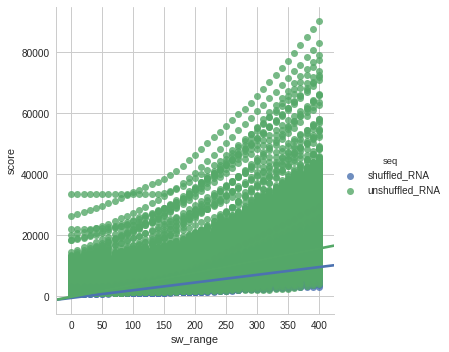

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
#fig = plt.figure(figsize=(16,14))
#ax = fig.gca()# define axis
# violine plot

sns.lmplot(x="sw_range", y="score", hue="seq", data=df_shuffled_and_unshuffled)

#ax.set_title('Locarna scors for different structure weights')
#ax.set_xlabel('structure weight')
#ax.set_ylabel('locarna score')

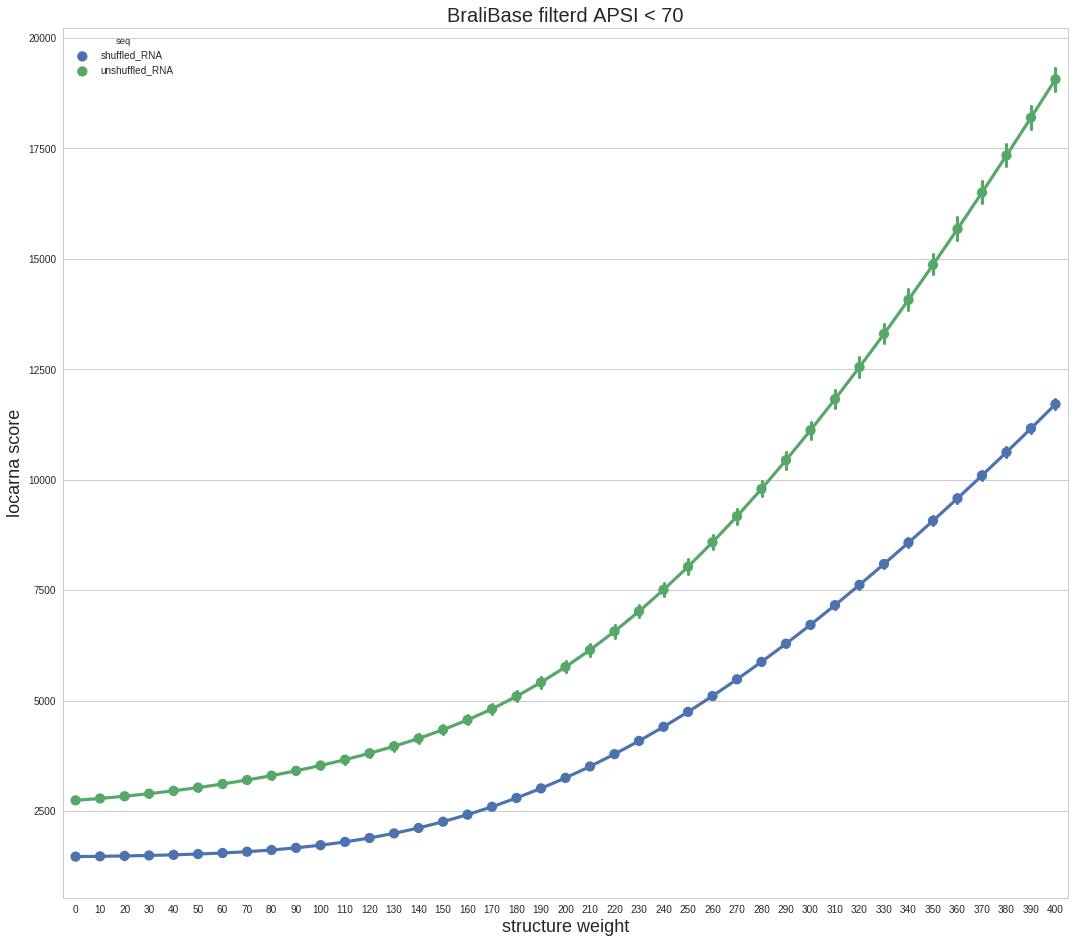

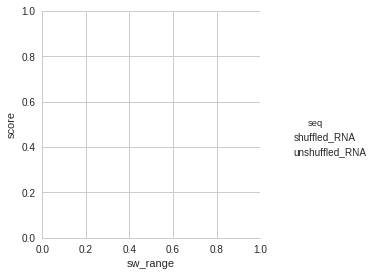

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
#sns.set_context("paper")
fig = plt.figure(figsize=(18,16))
ax = fig.gca()# define axis

sns.factorplot(x="sw_range", y="score", hue="seq", data=df_shuffled_and_unshuffled, ax=ax, alpha =1)

#ax.set_title('Comparison of LocARNA alignemnt score using Bralibase with context 100', fontsize=20)
ax.set_title('BraliBase filterd APSI < 70', fontsize=20)
#ax.set_title('Full BraliBase', fontsize=20)
ax.set_xlabel('structure weight', fontsize=18)
ax.set_ylabel('locarna score', fontsize=18)

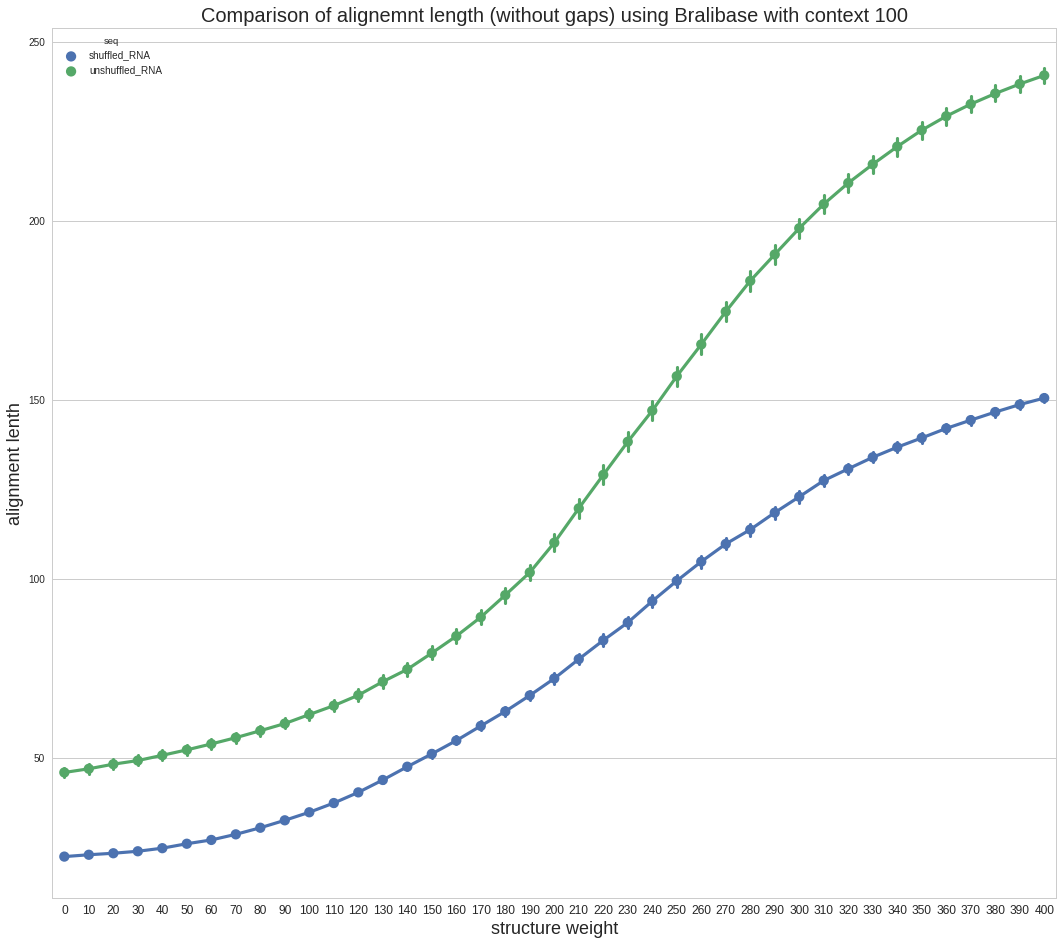

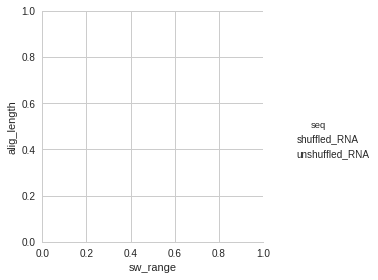

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
fig = plt.figure(figsize=(18,16))
plt.xticks(fontsize=12, rotation=0)


ax = fig.gca()# define axis
sns.factorplot(x="sw_range", y="alig_length", hue="seq", data=df_shuffled_and_unshuffled, ax=ax, alpha =1)
#ax.set_title('BraliBase filterd APSI < 70', fontsize=20)
#ax.set_title('Full BraliBase', fontsize=20)
ax.set_title('Comparison of alignemnt length (without gaps) using Bralibase with context 100', fontsize=20)
ax.set_xlabel('structure weight', fontsize=18)
ax.set_ylabel('alignment lenth', fontsize=18)


In [120]:
sw_list = ['10', '50','100','150','200','250','350']
df_plot_sens, df_plot_spec = create_statisics_df(df_dict, sw_list)
df_plot, df_emty = create_statisics_df(df_dict, sw_list, False)

In [113]:
df_plot_sens.head()

,sensitivity_sw_10,sensitivity_sw_50,sensitivity_sw_100,sensitivity_sw_150,sensitivity_sw_200,sensitivity_sw_250,sensitivity_sw_350
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
1,0.980456,0.980456,0.980456,0.980456,0.986971,1.0,1.0
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
3,0.846760,0.846760,0.846760,0.846760,1.000000,1.0,1.0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


/home/muellert/miniconda2/envs/eden_env/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


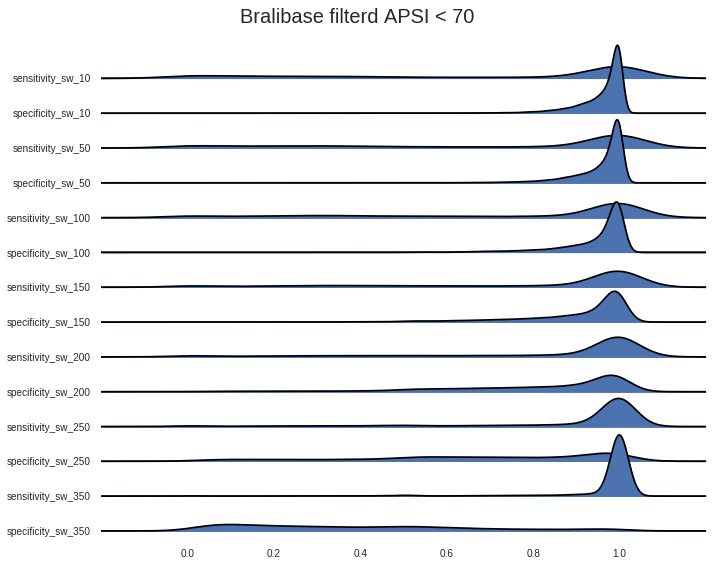

In [114]:
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.gca()# define axis
fig, axes = joypy.joyplot(df_plot, ax=ax)

#ax.set_title('Locarna scors for different structure weights')
#ax.set_xlabel('structure weight')
#ax.set_ylabel('locarna score')
#fig.suptitle('Distriburtion of sensitivity (RNA) and specificity (context)', fontsize=18)
fig.suptitle('Bralibase filterd APSI < 70', fontsize=20)

/home/muellert/miniconda2/envs/eden_env/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


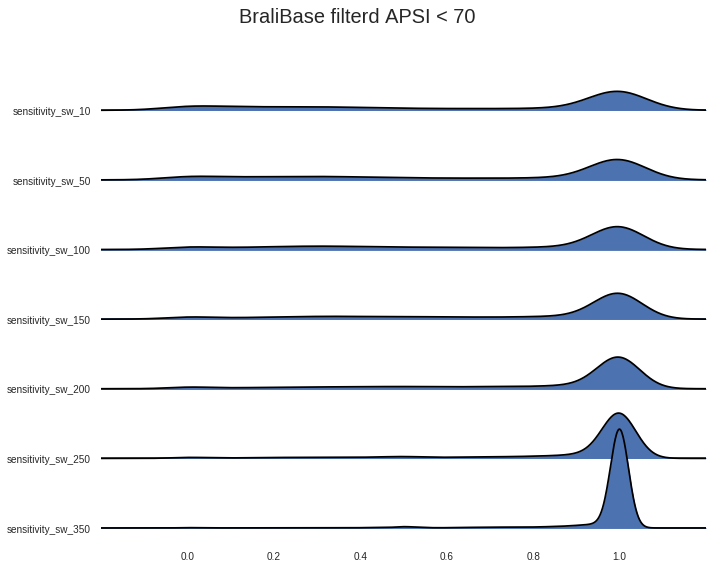

In [115]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.gca()# define axis
fig, axes = joypy.joyplot(df_plot_sens, ax=ax)

#ax.set_title('Locarna scors for different structure weights')
#ax.set_xlabel('structure weight')
#ax.set_ylabel('locarna score')
#fig.suptitle('Distriburtion of sensitivity (RNA)', fontsize=18)
fig.suptitle('BraliBase filterd APSI < 70', fontsize=20)
#fig.suptitle('Full BraliBase', fontsize=20)


/home/muellert/miniconda2/envs/eden_env/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


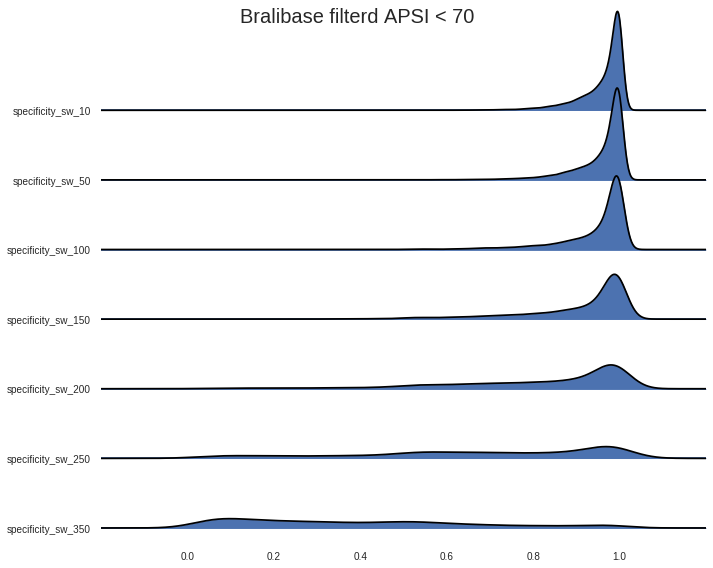

In [116]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.gca()# define axis
fig, axes = joypy.joyplot(df_plot_spec, ax=ax)

#ax.set_title('Locarna scors for different structure weights')
#ax.set_xlabel('structure weight')
#ax.set_ylabel('locarna score')
#fig.suptitle('Distriburtion of specificity (context)', fontsize=18)
fig.suptitle('Bralibase filterd APSI < 70', fontsize=20)
#fig.suptitle('Full BraliBase', fontsize=20)

In [117]:
sw_list = ['10','100','150','200','250','350']
df_plot_sens, df_plot_spec = create_statisics_df(df_dict_shuffled_seq, sw_list)
df_plot, df_emty = create_statisics_df(df_dict_shuffled_seq, sw_list, False)

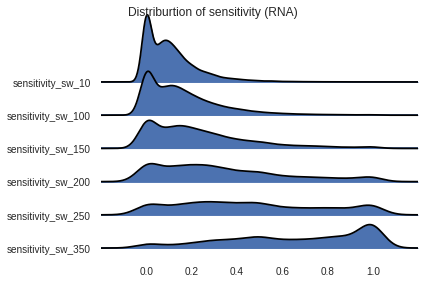

In [96]:
%matplotlib inline
#fig = plt.figure(figsize=(10,8))
#ax = fig.gca()# define axis
fig, axes = joypy.joyplot(df_plot_sens)

#ax.set_title('Locarna scors for different structure weights')
#ax.set_xlabel('structure weight')
#ax.set_ylabel('locarna score')
fig.suptitle('Distriburtion of sensitivity (RNA)')

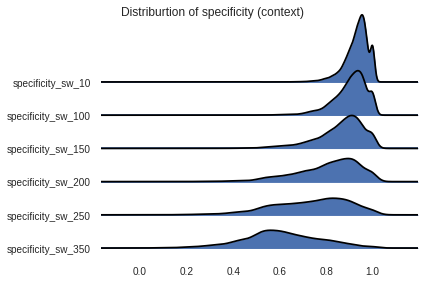

In [97]:
%matplotlib inline
#fig = plt.figure(figsize=(10,8))
#ax = fig.gca()# define axis
fig, axes = joypy.joyplot(df_plot_spec)

#ax.set_title('Locarna scors for different structure weights')
#ax.set_xlabel('structure weight')
#ax.set_ylabel('locarna score')
fig.suptitle('Distriburtion of specificity (context)')